In [22]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [23]:
!pip install umap-learn

In [24]:
import seaborn as sns
import umap
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [25]:
data_train = pd.read_json("/content/drive/MyDrive/Deeeep learning/Sarcasm Headlines/train_Sarcasm_Headlines_Dataset.json", lines=True)
train_labels = data_train.is_sarcastic.values
electra_embeddings_train = np.load("/content/drive/MyDrive/Deeeep learning/embeddings/electra_embeddings_train.npy")

data_test = pd.read_json("/content/drive/MyDrive/Deeeep learning/Sarcasm Headlines/test_Sarcasm_Headlines_Dataset.json", lines=True)
test_labels = data_test.is_sarcastic.values
electra_embeddings_test = np.load("/content/drive/MyDrive/Deeeep learning/embeddings/electra_embeddings_test.npy")

In [26]:
manifold = umap.UMAP().fit(electra_embeddings_train)
X_reduced = manifold.transform(electra_embeddings_test)

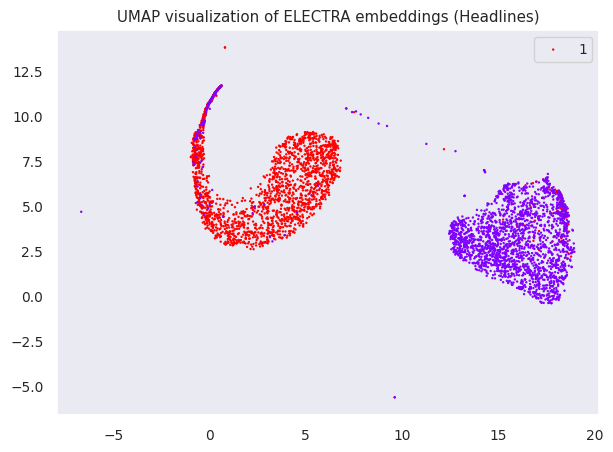

In [27]:
f = plt.figure()
sns.set(style='dark', font_scale=0.9, palette="hls", rc={'figure.figsize':(7,5)})
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=test_labels, s=0.5, cmap='rainbow')
plt.title("UMAP visualization of ELECTRA embeddings (Headlines)")
plt.legend(test_labels)
plt.show()
f.savefig("electra_headlines.png")

In [28]:
data_train = pd.read_json("/content/drive/MyDrive/Deeeep learning/Sarcasm Headlines/train_Sarcasm_Headlines_Dataset.json", lines=True)
train_labels = data_train.is_sarcastic.values
contrastive_embeddings_train = np.load("/content/drive/MyDrive/Deeeep learning/embeddings/bert-BOTH-FULL-headlines-isarcasm-with-synt-50epochs_train.npy")

In [29]:
isarcasm_test = pd.read_csv('/content/drive/MyDrive/Deeeep learning/iSarcasm/isarcasm_test.csv')
isarcasm_test_labels = isarcasm_test.sarcastic.values
isarcasm_embeddings = np.load('/content/drive/MyDrive/Deeeep learning/embeddings/isarcasm_bert-BOTH-FULL-headlines-isarcasm-with-synt-50epochs.npy')

In [30]:
manifold_c = umap.UMAP().fit(contrastive_embeddings_train)
X_reduced_c = manifold_c.transform(isarcasm_embeddings)

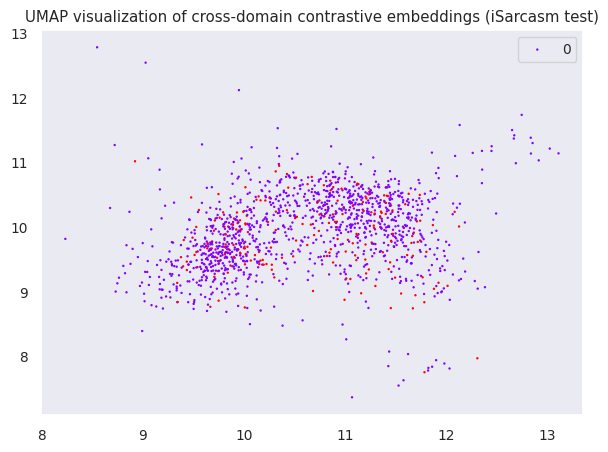

In [31]:
f = plt.figure()
sns.set(style='dark', font_scale=0.9, palette="hls", rc={'figure.figsize':(7,5)})
plt.scatter(X_reduced_c[:, 0], X_reduced_c[:, 1], c=isarcasm_test_labels, s=0.5, cmap='rainbow')
plt.title("UMAP visualization of cross-domain contrastive embeddings (iSarcasm test)")
plt.legend(isarcasm_test_labels)
plt.show()
f.savefig("isarcasm_contrastive.png")